<a href="https://colab.research.google.com/github/Yuvaraj-Premlal/NLP_Deep_Learning/blob/main/DeepLearning_in_NLP_%7C_Part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Deep Learning in Natural Language Processing**

Part 1 : Understand the basics of working with text

(a) How to view "Text" as a NLP professional?

Text should be viewed as a form of sequence of data rather than with human sense. It can be understood either as a sequence of characters or sequence of words, but its most common to work at the level of words.



(b) What is "Deep Learning" for NLP?

Deep learning for natural language processing is pattern recognition applied to words, sentences and paragraphs. These elements of a language (words, sentences and paragraphs) are analogous to pixels in computer vision projects involving images.

(c) What should be the first step in applying deep learning concepts to NLP?

Once you download the dataset, your first step should be to **Vectorize** the text in it.

Vectorization refers to converting input raw text in to numeric tensors. Because Deep learning models do not take text as input ( in almost all cases ) , this process is essential.

(d) What are the methods to Vectorize input raw text?



*   **Segment text in to words and transform each word in to a vector**

   *Illustration_1:*

   ["Hello , How are you?"]  **to** ["hello","how","are","you"] **to** [1,0,1,1,0]

*   **Segment text in to characters and transform each character in to a vector**

   *Illustration_2:*

   ["Hello , How are you?"]  **to** ["hello","how","are","you"] **to** ['h','e','l','o','w','a','r','e','y','u'] **to**[1,0,1,1,0]


*   **Extract N-grams of words or characters and tranform each n-gram in to a vector. (N-grams are overlapping groups of multiple consecutive words.**

  *Illustration_3:*

   ["Hello , How are you?"]  **to** ["hello how","are you"] **to**[1,0,1,1,0]




(e) What are "Tokens"?

Tokens are the the units in to which the given text is broken down.

In the above illustrations , the list of tokens are  

*  ["hello","how","are","you"]
*  ['h','e','l','o','w','a','r','e','y','u]
*  ["hello how","are you"]



(f) What are the different Vectorization Techniques?

Though there are multiple ways, let us focus on two major types:


*   One hot encoding 
*   Token embedding


In [1]:
# One hot encoding of text 

import numpy as np
sample_data = ['Hello , Hello How are you?','I had my breakfast']

#Tokenization

# Build an dictionary of tokens and its index in the sample_data
# Required output is a dictionary of items where every word is the "key" and every index is the "value"
token_index = {}

# Loop through each sentence in sample_data
# Split the sentence in to seperate words
# Assign an index value to the same
for sentence in sample_data:
  for word in sentence.split():
    #print(word)
    if word not in token_index:
      token_index_length = len(token_index)
      token_index[word] = token_index_length + 1

print(token_index)

{'Hello': 1, ',': 2, 'How': 3, 'are': 4, 'you?': 5, 'I': 6, 'had': 7, 'my': 8, 'breakfast': 9}


Note the following in the output:

*   Since it is a dictionary, all "words" are unique. For instance, there were two "Hello" in the sample_data; however, we see only one in the output dictionary.
*   Special character like comma (,) is treated as a word. We will learn how to reduce the impact of punctuations later.




Next step:

Create a numpy array that resembles the following image, for all the sentences in the sample_data.


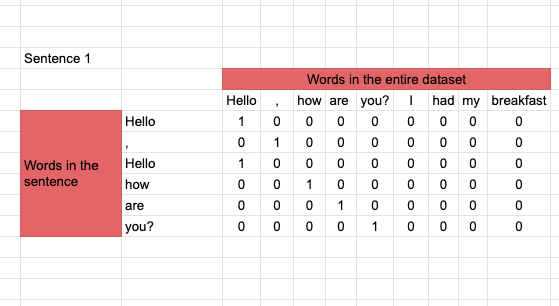



In [2]:
# create a np array of zeros

# Define the length of maximum possible words in a sentence. 
max_possible_tokens = 6 

# Define the shape of the array
# We need an array of all sentences which in turn should be an array of its tokens [["Hello",",","Hello","How","are","you?"], sentence_2]
# Every token should have a one hot encoded numerical array of its own
# There are 2 sentences with maximum 6 tokens in a sentence and there are 9 such unique tokens as stored in token_index dictionary
# Thus the minimum shape required is (2,6,9); However, you can have much larger shape as well, anticipating more tokens and unique words

word_vector = np.zeros(shape=(len(sample_data),max_possible_tokens,max(token_index.values())))
print("Word vector shape",word_vector.shape)
print("Zero matrix\n" ,word_vector)



for i , sample in enumerate(sample_data): # index the sentence
  for j,word in list(enumerate(sample.split())): # split the sentence in to words and index it
    index = token_index.get(word) # get index value of the specific word from token_index dictionary
    print(i,j,index-1,word) 
    word_vector[i,j,index-1] = 1 # Set the value to 1 for the position given by sentence index, word index and dictionary index

print(word_vector)

Word vector shape (2, 6, 9)
Zero matrix
 [[[0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0.]]

 [[0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0.]]]
0 0 0 Hello
0 1 1 ,
0 2 0 Hello
0 3 2 How
0 4 3 are
0 5 4 you?
1 0 5 I
1 1 6 had
1 2 7 my
1 3 8 breakfast
[[[1. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 1. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 1. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 1. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 1. 0. 0. 0. 0.]]

 [[0. 0. 0. 0. 0. 1. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 1. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0.]]]


**Using Tensorflow and Keras**

You can create similar numpy array with Keras Library as well.

In [41]:
# Using keras for word-level one-hot encoding
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.text import Tokenizer

# split the sentence in to texts
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words = 10)
tokenizer.fit_on_texts(sample_data)
print(tokenizer.word_index)

{'hello': 1, 'how': 2, 'are': 3, 'you': 4, 'i': 5, 'had': 6, 'my': 7, 'breakfast': 8}


Notice the output. All words are "normalised" ( that is changed to lower case) , punctuations removes and unique word dictionary created.

In [55]:
# Convert to numpy array

sequences = tokenizer.texts_to_sequences(sample_data) # converts each text in sample_data to sequence of integers
print("Corresponding word sequences",sequences)

# numpy array using "binary"mode
# the output gives information about presence of a word in a document. If present , the value will be set to 1
one_hot_encoding = tokenizer.texts_to_matrix(sample_data,mode='binary')
print("Binary_mode\n", one_hot_encoding)

# numpy array using "count"mode
# output array will have count of every term in a given sentence
one_hot_encoding = tokenizer.texts_to_matrix(sample_data,mode='count')
print("Count_mode\n", one_hot_encoding)

# numpy array using "freq"mode
# output array will have the freq distribution probability of the given term in a sentence calculated across the sentence
one_hot_encoding = tokenizer.texts_to_matrix(sample_data,mode='freq')
print("Freq_mode\n", one_hot_encoding)

Corresponding word sequences [[1, 1, 2, 3, 4], [5, 6, 7, 8]]
Binary_mode
 [[0. 1. 1. 1. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 1. 1. 1. 0.]]
Count_mode
 [[0. 2. 1. 1. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 1. 1. 1. 0.]]
Freq_mode
 [[0.   0.4  0.2  0.2  0.2  0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.25 0.25 0.25 0.25 0.  ]]


**One hot encoding with hashing trick**

-  This method will be handy when the unique tokens in the vocabulary is too large to handle explicitly

-  In this method, every word is hashed in to vectors of fixed size

-  It eliminates the necessity of storing every term with an index in a dictionary

- One drawback is hash collisions ; two words ending up with same hash. This can be overcome with larger dimensionality space.

In [59]:
# One hot encoding with hashing trick
dimensionality = 1000
# create a numpy zero matrix of shape (2, 10, 1000) 
# 2 sentences, 10 unique words in each with dimensionality 1000
numpy_matrix = np.zeros((len(sample_data),10,dimensionality))

for i,sample in enumerate(sample_data):
  for j, word in list(enumerate(sample.split())):
    index=abs(hash(word)) % dimensionality
    numpy_matrix[i,j,index] = 1

[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]
